In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date =session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("The most recent date in the database: " , recent_date)

The most recent date in the database:  ('2017-08-23',)


The date one year from the most recent date is:  2016-08-23


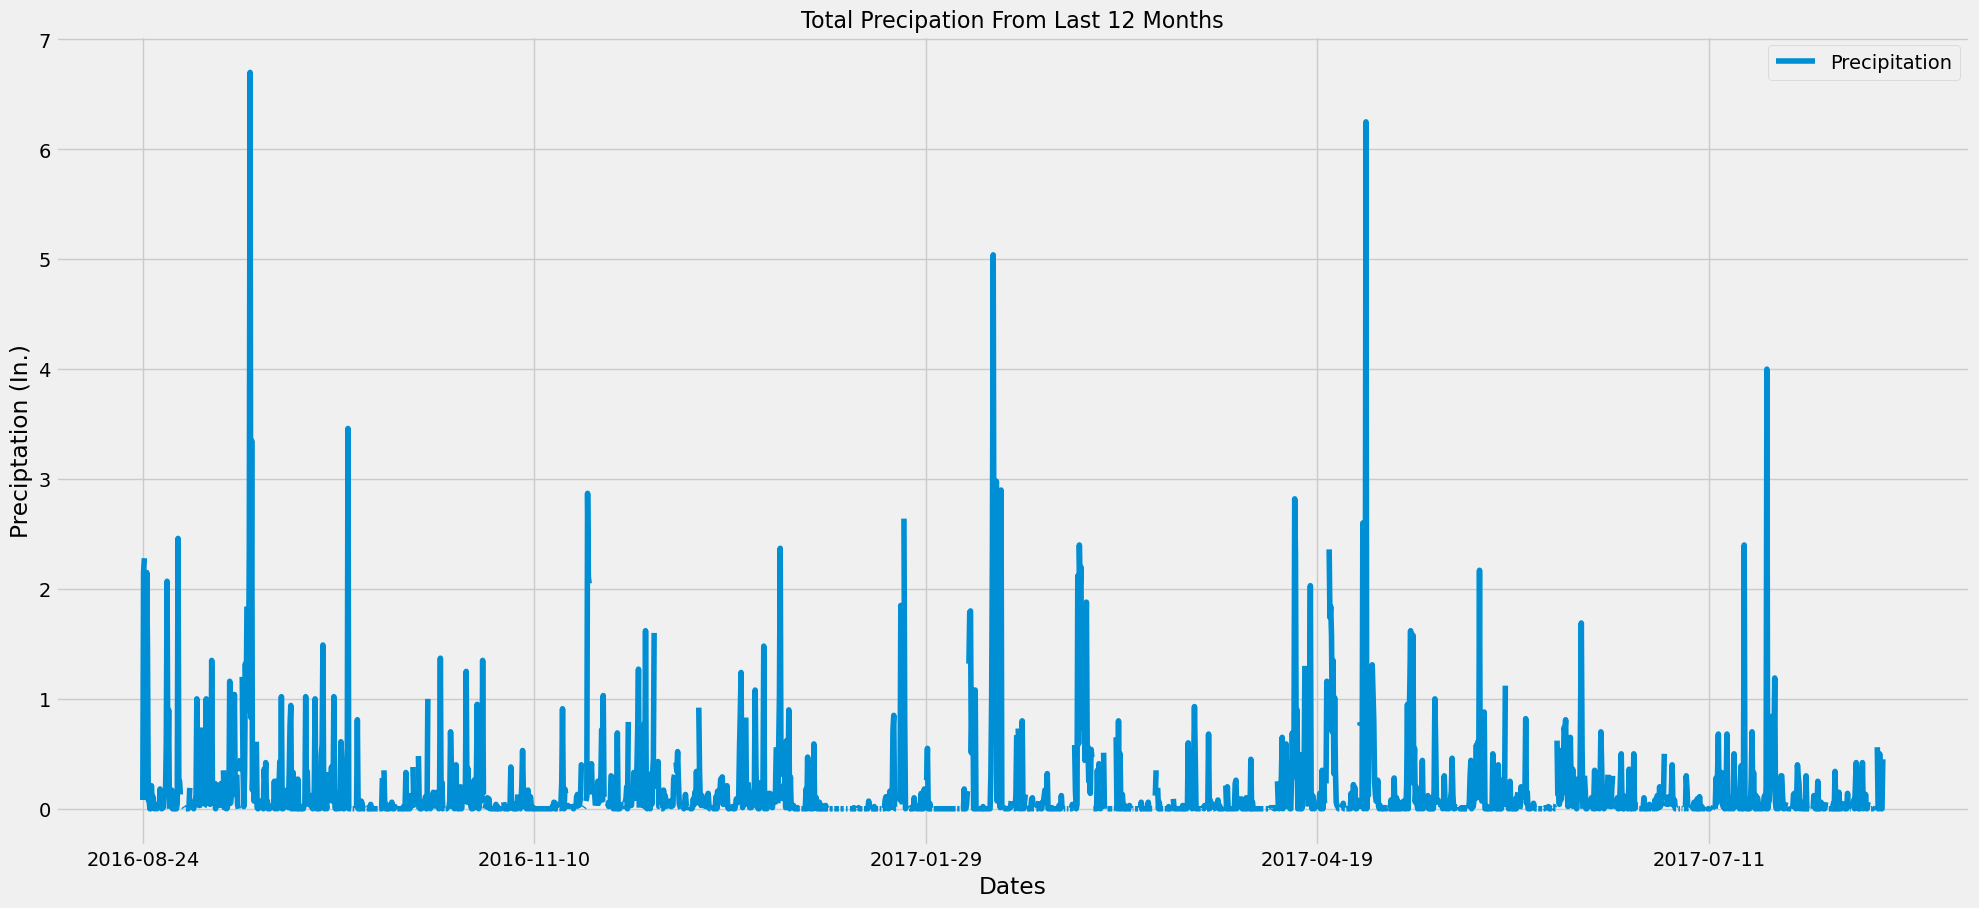

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("The date one year from the most recent date is: ", year_ago)
# Perform a query to retrieve the data and precipitation scores
year_precip = session.query(Measurement.prcp , Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
year_precip

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(year_precip, columns = ['Precipitation', 'Dates'])
df.set_index('Dates')

# Sort the dataframe by date
df_dates = df.sort_values(by = 'Dates')

# Use Pandas Plotting with Matplotlib to plot the data
df_dates.plot(x = 'Dates' , grid = True , figsize=(22,10))
plt.ylabel("Preciptation (In.)")


plt.title("Total Precipation From Last 12 Months" , size = 16)
plt.show()



In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_dates.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Measurement.station)).all()
total_stations

[(19550,)]

In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query( Measurement.station , func.count(Measurement.station)).group_by( Measurement.station ).\
               order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_active_stations = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                      func.avg(Measurement.tobs)).\
                      filter(Measurement.station == 'USC00519281' ).all()

temp_active_stations

[(54.0, 85.0, 71.66378066378067)]

In [34]:
# Pull the last 12 months of data from the most active station
active_last_12 = session.query(Measurement.tobs).\
                          filter(Measurement.station == 'USC00519281' ).\
                          filter(Measurement.date >= '2017,8,23').all()

active_last_12

[(72.0,),
 (70.0,),
 (64.0,),
 (63.0,),
 (63.0,),
 (62.0,),
 (70.0,),
 (70.0,),
 (62.0,),
 (62.0,),
 (63.0,),
 (65.0,),
 (69.0,),
 (77.0,),
 (70.0,),
 (74.0,),
 (69.0,),
 (72.0,),
 (71.0,),
 (69.0,),
 (71.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (69.0,),
 (70.0,),
 (66.0,),
 (65.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (59.0,),
 (60.0,),
 (70.0,),
 (73.0,),
 (75.0,),
 (64.0,),
 (59.0,),
 (59.0,),
 (62.0,),
 (68.0,),
 (70.0,),
 (73.0,),
 (79.0,),
 (75.0,),
 (65.0,),
 (70.0,),
 (74.0,),
 (70.0,),
 (70.0,),
 (71.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (61.0,),
 (67.0,),
 (65.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (77.0,),
 (73.0,),
 (67.0,),
 (62.0,),
 (64.0,),
 (67.0,),
 (66.0,),
 (81.0,),
 (69.0,),
 (66.0,),
 (67.0,),
 (69.0,),
 (66.0,),
 (68.0,),
 (65.0,),
 (74.0,),
 (69.0,),
 (72.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (74.0,),
 (68.0,),
 (73.0,),
 (71.0,),
 (74.0,),
 (75.0,),
 (70.0,),
 (67.0,),
 (71.0,),
 (67.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (67.0,),


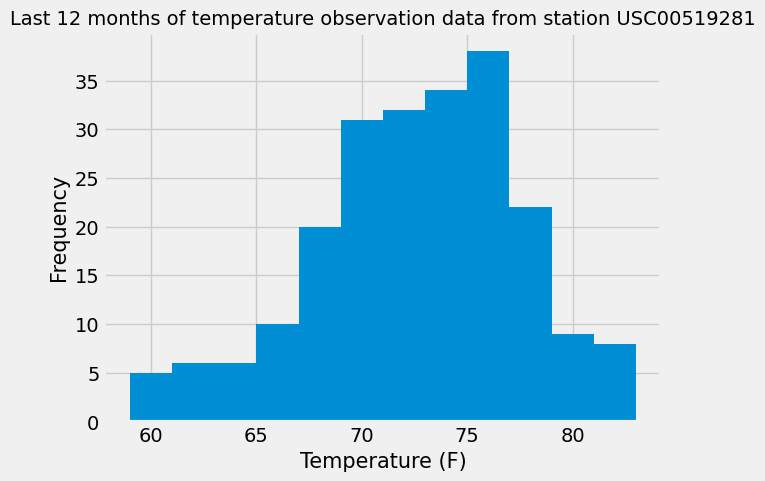

In [39]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_df = pd.DataFrame(active_last_12 , columns = ['Tobs'])

active_df.hist( bins = 12)

plt.xlabel("Temperature (F)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Last 12 months of temperature observation data from station USC00519281" ,
           size = 14)

plt.show()

# Close session

In [40]:
# Close Session
session.close()